In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('cleaned_data.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,Bathrooms,Bedrooms,Coverage,Domestic Rooms,Erf Size,Family/TV Room,Floor Size,Garage,Levies,Nearby Public Transport,...,Wall,Window,City,Price,Province,Suburbaine,Dining Rooms,Garden,Kitchens,Lounges
0,2.0,3.0,NaN,NaN,NaN,3.0,133.0,1.0,1800.0,NaN,...,NaN,NaN,roodepoort,1395000.0,gauteng,weltevreden-park,1.0,1.0,1.0,NaN
1,3.0,3.0,NaN,NaN,NaN,NaN,127.0,NaN,4055.0,NaN,...,NaN,NaN,umhlanga,4950000.0,kwazulu-natal,sibaya-precinct,1.0,1.0,1.0,1.0
2,1.5,1.0,NaN,NaN,NaN,NaN,71.0,NaN,4500.0,3.0,...,NaN,NaN,sandton,4999000.0,gauteng,sandton-central,NaN,NaN,1.0,1.0
3,2.0,3.0,NaN,NaN,400.0,NaN,140.0,2.0,1050.0,NaN,...,NaN,NaN,somerset-west,1650000.0,western-cape,sir-lowrys-pass,NaN,NaN,NaN,1.0
4,2.0,3.0,NaN,NaN,NaN,NaN,84.0,NaN,1878.0,NaN,...,NaN,NaN,jeffreys-bay,1295000.0,eastern-cape,jeffreys-bay-central,NaN,NaN,1.0,1.0


# PRE-PROCESSING

In [6]:
# transform True to 1 and False to 0
boolean_features = ["No Transfer Duty", "Office","Pets Allowed", "Standalone Building"]
def process_boolean_features(value):
    if value==True:
        return 1
    else:
        return 0

In [7]:
for col in boolean_features:
    df[col] = df[col].map(process_boolean_features)

In [8]:
for col in df.columns:
    print(col, ">>" , df[col].unique())
    print("------------\n")

Bathrooms >> [ 2.   3.   1.5  2.5  5.   1.   nan  4.   3.5  4.5  6.   7.   8.   5.5
 11.   6.5 10.   8.5  9.  10.5 18.  16.  22.  14.  24.  12.  13.  30.
 15.  20.   7.5 34.   9.5 17.  12.5 25.   0.5 19.  52.  26.  15.5 23.
 50.  35.  54.  53. ]
------------

Bedrooms >> [ 3.   1.   5.   2.   4.   nan  6.   7.   8.   0.5 11.   1.5 13.   9.
  2.5 10.   7.5 18.  16.   3.5 14.  12.  20.  36.  21.  15.  30.  17.
  4.5 55.  19.  28.  29.  24.  34.  50.  22.  42.  49.  32.  52.  26.
 23.  27.  54.  25.  82. ]
------------

Coverage >> [ nan  27.  25.  32.  28.  35.  19.  10.  71.  48.  36.  38.  31.  29.
  61.  47.  50.  45.  23.  43.  24.  53.  73.  44.  22. 100.  18.  16.
  11.   1.  69.  21.  46.  59.  30.  33.  52.   7.  79.  37.  15.  12.
  39.  84.  40.  62.  56.   5.  26.  13.  57.  41.  20.  65.  49.  72.
  17.  66.  64.  74.   4.  42.  92.  78.  87.   3.  51.  86.  55.  82.
   9.  97.  81.  80.   2.  54.  85.  58.  98.  70.  60.  68.  34.  63.
  67.  99.  14.  96.   8.   6.  94.  77

In [9]:
#taux de valeur manquante
missing_rate = df.isna().sum()/df.shape[0]

In [10]:
df.describe()

,Bathrooms,Bedrooms,Coverage,Domestic Rooms,Erf Size,Family/TV Room,Floor Size,Garage,Levies,Nearby Public Transport,...,Rates and Taxes,Reception Rooms,Special Features,Standalone Building,Temperature Control,Price,Dining Rooms,Garden,Kitchens,Lounges
count,26274.000000,27379.000000,1856.000000,2686.000000,1.681200e+04,2831.000000,16371.000000,14562.000000,13434.000000,1620.000000,...,1.793600e+04,4030.000000,30941.000000,30941.000000,30941.000000,3.093800e+04,12587.000000,11384.000000,23499.000000,17122.000000
mean,2.295501,3.236659,38.591595,1.066270,5.964602e+07,1.818792,277.772402,1.854484,2016.813161,1.777778,...,2.827602e+03,1.641191,0.159756,0.050709,0.064510,2.152073e+06,1.008024,1.000088,1.000170,1.018689
std,1.825263,2.056131,26.014266,0.421138,7.717042e+09,1.244641,6236.413652,1.075881,13161.478373,0.727132,...,1.123337e+05,1.285616,0.879217,0.219407,0.310203,3.163522e+06,0.192871,0.009372,0.020629,0.180534
min,0.500000,0.500000,1.000000,1.000000,9.800000e-01,1.000000,1.000000,0.500000,0.000000,1.000000,...,0.000000e+00,1.000000,0.000000,0.000000,0.000000,4.100000e+03,0.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,21.000000,1.000000,3.640000e+02,1.000000,69.000000,1.000000,930.000000,1.000000,...,4.500000e+02,1.000000,0.000000,0.000000,0.000000,7.450000e+05,1.000000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,31.000000,1.000000,9.430000e+02,1.000000,108.000000,2.000000,1411.000000,2.000000,...,7.845000e+02,1.000000,0.000000,0.000000,0.000000,1.250000e+06,1.000000,1.000000,1.000000,1.000000
75%,2.500000,4.000000,50.000000,1.000000,1.884250e+03,2.000000,220.000000,2.000000,2124.000000,2.000000,...,1.325000e+03,2.000000,0.000000,0.000000,0.000000,2.399000e+06,1.000000,1.000000,1.000000,1.000000
max,54.000000,82.000000,100.000000,14.000000,1.000600e+12,11.000000,750000.000000,29.000000,865000.000000,3.000000,...,1.380000e+07,46.000000,13.000000,1.000000,5.000000,1.450000e+08,11.000000,2.000000,4.000000,5.000000


### Elimination des colonnes 

In [11]:
# unused_columns = ['Listing Date','Listing Number']

In [12]:

for col in df.columns[missing_rate < 0.95]:
    if col not in df.columns[missing_rate < 0.90]:
        print(col)

Coverage
Domestic Rooms
Family/TV Room
Nearby Public Transport
Style
Window


In [13]:
#On elimine les variables à valeur manquante à 95%
df = df[df.columns[missing_rate < 0.90]]

In [17]:
df.columns

Index(['Bathrooms', 'Bedrooms', 'Erf Size', 'Floor Size', 'Garage', 'Levies',
       'No Transfer Duty', 'Office', 'Parking', 'Pets Allowed', 'Price per m²',
       'Rates and Taxes', 'Reception Rooms', 'Roof', 'Security',
       'Special Features', 'Standalone Building', 'Temperature Control',
       'Type of Property', 'Wall', 'City', 'Price', 'Province', 'Suburbaine',
       'Dining Rooms', 'Garden', 'Kitchens', 'Lounges'],
      dtype='object')

In [14]:
# df = df.drop(unused_columns,axis=1)

In [18]:
df.shape

(30938, 28)

In [19]:
# def transform_floor_size(value):
#     value = str(value)
#     value = value.replace("m²", "")
#     value = value.replace(" ","")
#     return float(value)

In [20]:
# df['Floor Size'] = df['Floor Size'].map(transform_floor_size)

In [21]:
# df['Erf Size'].unique()

In [22]:
# def transform_erf_size(value):
#     value = str(value)
#     if 'ha' in value:
#         value = value.replace("ha", "")
#         value = value.replace("s","")
#         value = value.replace(" ","")
#         return float(value)*10000
#     elif 'acre' in value:
#         value = value.replace("acre", "")
#         value = value.replace("s","")
#         value = value.replace(" ","")
#         return float(value)*4046.86
#     else:
#         value = value.replace("m²", "")
#         value = value.replace(" ","")
#         return float(value)
        

In [23]:
# df['Erf Size'] = df['Erf Size'].map(transform_erf_size)

In [24]:
# df.dtypes.value_counts()

In [25]:
# df['Town'].unique().shape

In [26]:
# df['Type of Property'].value_counts()

In [27]:
df = df[~df["Price"].isna()]

### Elimination des entrées sans prix

In [28]:
# mask = df['Price'].isna()
# df = df[~mask]
# df['Price'].isna().sum()

## TrainTest - Nettoyage - Encodage

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [30]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [31]:
# trainset['Town'].value_counts().shape

In [32]:
# testset['Town'].value_counts().shape

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector

In [34]:
def encodage():

    categorical_features = [
                            'Wall','Security','Roof','City','Province','Suburbaine',
                            'Type of Property'
                        ]
    
    integer_features = [
        "Bathrooms", "Bedrooms", "Garage", "Parking", 
          "Reception Rooms", "Special Features", 
        "Temperature Control", "Dining Rooms", "Garden", "Kitchens", "Lounges", 
        "No Transfer Duty", "Office","Pets Allowed", "Standalone Building"
    ]
    
#     integer_features = make_column_selector(dtype_include=np.number)
    
    print(len(categorical_features))
    print(len(integer_features))
    
    size_features = ['Erf Size', 'Floor Size', 'Price per m²', 'Rates and Taxes', 'Levies']
    
    categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown = "ignore"))
    
    
    size_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
    
    preprocessor = make_column_transformer((categorical_pipeline,categorical_features),
                                          (SimpleImputer(strategy='constant'),integer_features),
                                          (size_pipeline,size_features))
    return preprocessor

In [35]:
def preprocessing(df):
    X = df.drop('Price',axis=1)
    y = df['Price']
    
    return X, y

In [36]:
X_train, y_train = preprocessing(trainset)

In [37]:
X_test, y_test = preprocessing(testset)

# Modelisation

In [38]:
from sklearn.linear_model import LinearRegression, Ridge,  HuberRegressor, Lasso
from sklearn.ensemble import RandomForestRegressor

In [39]:
preprocessor = encodage()

7
15


In [40]:
LinearReg = make_pipeline(preprocessor, LinearRegression())
ridge = make_pipeline(preprocessor, Ridge())
lasso = make_pipeline(preprocessor, Lasso())
HuberReg = make_pipeline(preprocessor,HuberRegressor())
RandomForestReg = make_pipeline(preprocessor, RandomForestRegressor())

In [41]:
dict_of_models = {'LinearReg': LinearReg,
                  'ridge' : ridge,
                  'lasso': lasso,
                  'HuberReg': HuberReg,
                  'RandomForest': RandomForestReg
                 }

## Procédure d'évaluation

In [42]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve

In [43]:
def RMSE(y_test, y_pred):
    error = np.square(np.subtract(np.log(y_test),np.log(y_pred))).mean()
#     error = np.square(np.subtract(y_test,y_pred)).mean()
    error = np.sqrt(error)
    return error

In [44]:
def normal_error(y_test, y_pred):
    error = np.abs(y_test - y_pred).sum() / y_test.shape[0]
    return error

In [45]:
#scoring customized
my_scorer = make_scorer(RMSE, greater_is_better=True)

In [46]:
def evaluation(model):
    
    print(X_train)     
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Normal Mean Error: ", normal_error(y_test, y_pred))
    print('Root Mean Squared Error: ',RMSE(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4,train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    
    

In [47]:
print("Linear Regression")
evaluation(LinearReg)

Linear Regression
       Bathrooms  Bedrooms   Erf Size  Floor Size  Garage  Levies  \
16400        3.0       3.0  7150000.0         NaN     NaN     NaN   
7519         5.5       5.0     2067.0         NaN     3.0     NaN   
19698        2.0       3.0        NaN       222.0     NaN     NaN   
30210        2.0       5.0    17800.0         NaN     1.0     NaN   
220          1.0       3.0      300.0       133.0     NaN     NaN   
...          ...       ...        ...         ...     ...     ...   
13123        1.0       NaN        NaN        48.0     NaN  1913.0   
19648        1.0       2.0    43089.0        83.0     NaN     NaN   
9845         2.5       3.0        NaN         NaN     1.0     NaN   
10799        3.0       5.0      991.0         NaN     NaN  1000.0   
2732         1.0       2.0        NaN        74.0     NaN  2148.0   

       No Transfer Duty  Office  Parking  Pets Allowed  ...  \
16400                 0       0      0.0             1  ...   
7519                  0    

<ipython-input-43-2ea666a4f6a0>:2: RuntimeWarning: invalid value encountered in log
  error = np.square(np.subtract(np.log(y_test),np.log(y_pred))).mean()


KeyboardInterrupt: 

In [329]:
LinearReg.fit(X_train, y_train)
y_pred = LinearReg.predict(X_test)

In [332]:
LinearReg.score(X_test, y_test)

-5.499842589366054

In [370]:
X0 = X_test.iloc[0,:]

In [391]:
y_pred[1:10]

array([4520678.19762696,  919733.21222977, 7878627.4780681 ,
       5503254.6232678 ,  595776.15679808, 1511158.23696576,
        529037.52072597, 1184431.31036419, 3303983.30719583])

In [392]:
y_test.iloc[1:10]

28556    5495000.0
21371     799000.0
15656    5495000.0
18980    4100000.0
276      1725000.0
23136     795000.0
29131     650000.0
14091     689000.0
12116    3334500.0
Name: Price, dtype: float64

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

Ridge
       Bathrooms  Bedrooms  Coverage  Domestic Rooms   Erf Size  \
16400        3.0       3.0       NaN             NaN  7150000.0   
7519         5.5       5.0       NaN             1.0     2067.0   
19698        2.0       3.0       NaN             NaN        NaN   
30210        2.0       5.0       NaN             NaN    17800.0   
220          1.0       3.0       NaN             NaN      300.0   
...          ...       ...       ...             ...        ...   
13123        1.0       NaN       NaN             NaN        NaN   
19648        1.0       2.0       NaN             NaN    43089.0   
9845         2.5       3.0       NaN             NaN        NaN   
10799        3.0       5.0       NaN             NaN      991.0   
2732         1.0       2.0       NaN             NaN        NaN   

       Family/TV Room  Floor Size  Garage  Levies  Nearby Public Transport  \
16400             NaN         NaN     NaN     NaN                      NaN   
7519              NaN         NaN

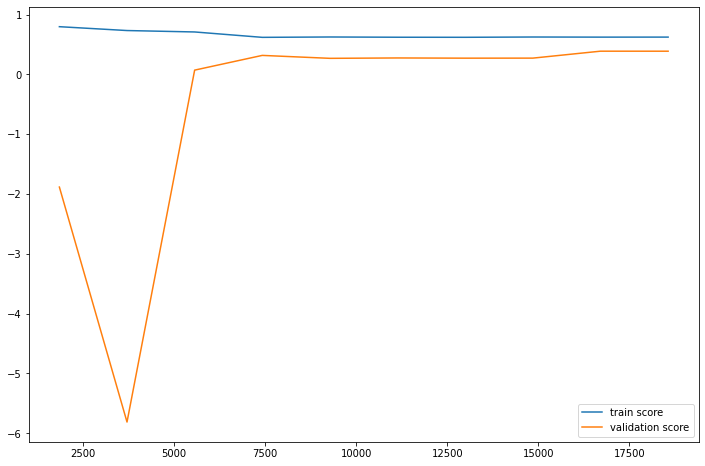

In [340]:
print("Ridge")
evaluation(ridge)

Robust Regression
       Bathrooms  Bedrooms  Coverage  Domestic Rooms   Erf Size  \
16400        3.0       3.0       NaN             NaN  7150000.0   
7519         5.5       5.0       NaN             1.0     2067.0   
19698        2.0       3.0       NaN             NaN        NaN   
30210        2.0       5.0       NaN             NaN    17800.0   
220          1.0       3.0       NaN             NaN      300.0   
...          ...       ...       ...             ...        ...   
13123        1.0       NaN       NaN             NaN        NaN   
19648        1.0       2.0       NaN             NaN    43089.0   
9845         2.5       3.0       NaN             NaN        NaN   
10799        3.0       5.0       NaN             NaN      991.0   
2732         1.0       2.0       NaN             NaN        NaN   

       Family/TV Room  Floor Size  Garage  Levies  Nearby Public Transport  \
16400             NaN         NaN     NaN     NaN                      NaN   
7519              NaN

/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Root Mean Squared Error:  14140975.603114221


/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

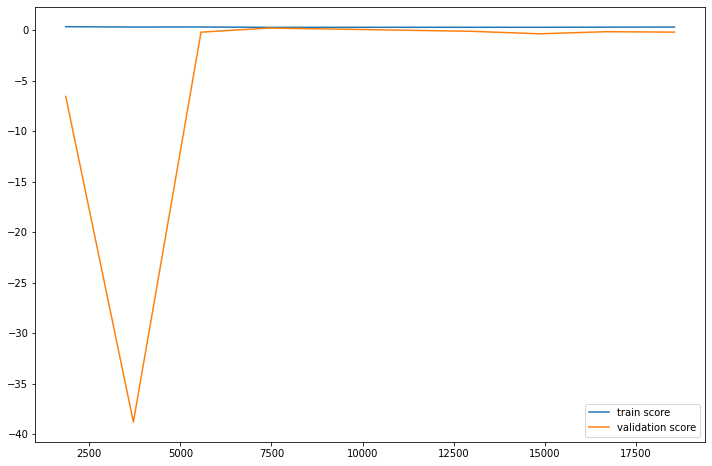

In [341]:
print("Robust Regression")
evaluation(HuberReg)


In [335]:
print("Lasso")
evaluation(lasso)

Lasso
       Bathrooms  Bedrooms  Coverage  Domestic Rooms   Erf Size  \
16400        3.0       3.0       NaN             NaN  7150000.0   
7519         5.5       5.0       NaN             1.0     2067.0   
19698        2.0       3.0       NaN             NaN        NaN   
30210        2.0       5.0       NaN             NaN    17800.0   
220          1.0       3.0       NaN             NaN      300.0   
...          ...       ...       ...             ...        ...   
13123        1.0       NaN       NaN             NaN        NaN   
19648        1.0       2.0       NaN             NaN    43089.0   
9845         2.5       3.0       NaN             NaN        NaN   
10799        3.0       5.0       NaN             NaN      991.0   
2732         1.0       2.0       NaN             NaN        NaN   

       Family/TV Room  Floor Size  Garage  Levies  Nearby Public Transport  \
16400             NaN         NaN     NaN     NaN                      NaN   
7519              NaN         NaN

/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6156048586554696e+16, tolerance: 25297108812768.848
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-322-f6b4c6b8365e>:2: RuntimeWarning: invalid value encountered in log
  error = np.square(np.subtract(np.log(y_test),np.log(y_pred))).mean()


Root Mean Squared Error:  0.7495387593479994


/home/sarobidy/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757803648433083.6, tolerance: 1328342141633.3948
  model = cd_fast.sparse_enet_coordinate_descent(


KeyboardInterrupt: 

## OPTIMISATION

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [65]:
ridge

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                    

In [52]:
hyper_params = {'ridge__alpha' : np.linspace(0.1,1,10)
               }

In [53]:
grid = GridSearchCV(ridge, hyper_params, scoring=my_scorer, cv=4)

In [66]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeW

{'ridge__alpha': 0.2}


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [67]:
print(grid.best_params_)

{'ridge__alpha': 0.2}


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Root Mean Squared Error:  0.7371800569970649


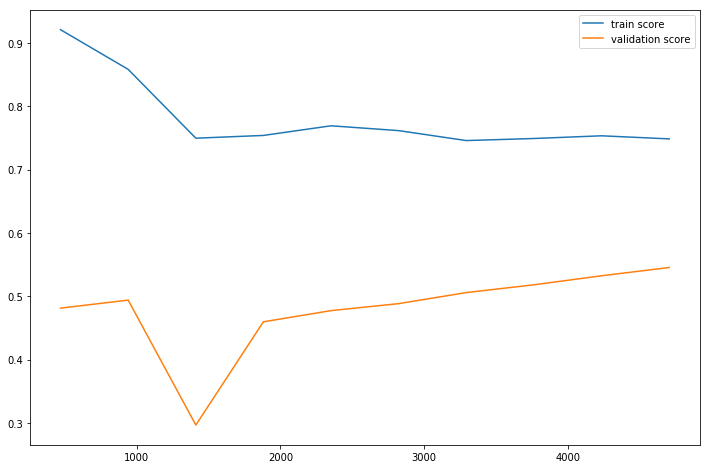

In [68]:
model_final = grid.best_estimator_
evaluation(model_final)

In [69]:
ridge_pol = make_pipeline(preprocessor,PolynomialFeatures(2), Ridge(alpha=0.2))

ridge_pol.fit(X_train, y_train)
y_pred = ridge_pol.predict(X_test)

print('Root Mean Squared Error: ',RMSE(y_test, y_pred))

Root Mean Squared Error:  0.6218467971239166


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [70]:
hyper_params = {'polynomialfeatures__degree' : [2,3],
                'ridge__alpha' : np.linspace(0.1,1,10)
               }
grid_pol = RandomizedSearchCV(ridge_pol, hyper_params, scoring='neg_mean_squared_error', cv=4,
                          n_iter=5)

### Evaluation avec my_scorer

In [74]:
def evaluation_my_scorer(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Root Mean Squared Error: ',RMSE(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,scoring=my_scorer,
                                              cv=4,train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Root Mean Squared Error:  0.7422742299982947


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeW

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


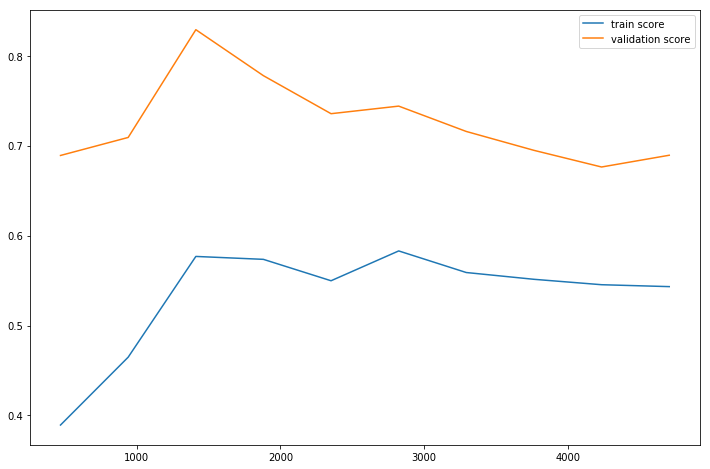

In [75]:
evaluation_my_scorer(LinearReg)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Root Mean Squared Error:  0.7459426842553379


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeW

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


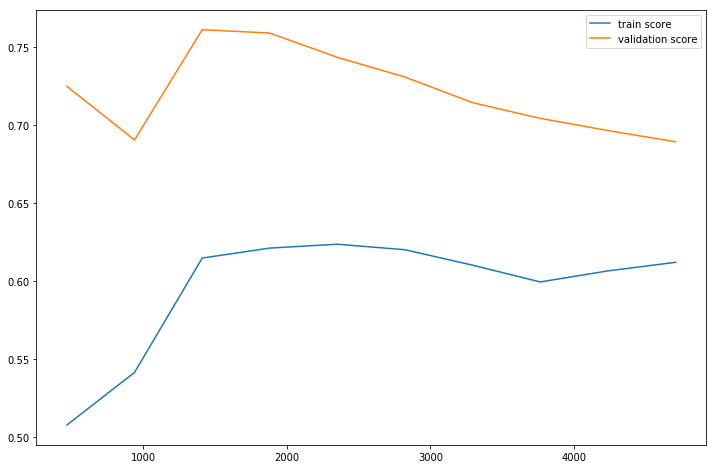

In [76]:
evaluation_my_scorer(ridge)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Root Mean Squared Error:  0.585057119502565


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeW

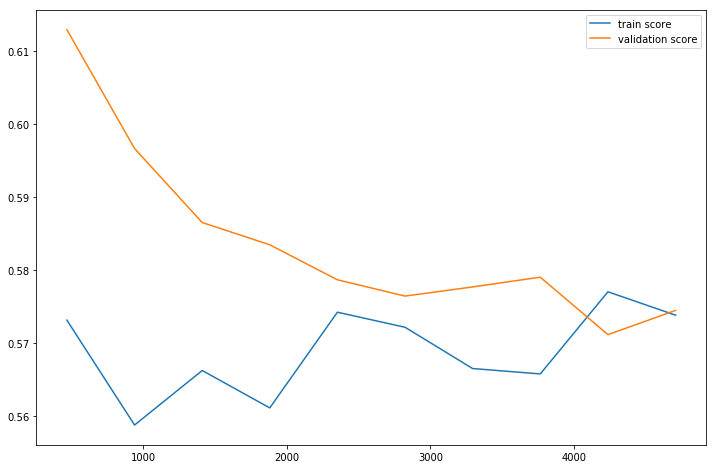

In [77]:
evaluation_my_scorer(HuberReg)

In [393]:
# evaluation RandomForest

In [63]:
evaluation(RandomForestReg)

       Bathrooms  Bedrooms   Erf Size  Floor Size  Garage  Levies  \
16400        3.0       3.0  7150000.0         NaN     NaN     NaN   
7519         5.5       5.0     2067.0         NaN     3.0     NaN   
19698        2.0       3.0        NaN       222.0     NaN     NaN   
30210        2.0       5.0    17800.0         NaN     1.0     NaN   
220          1.0       3.0      300.0       133.0     NaN     NaN   
...          ...       ...        ...         ...     ...     ...   
13123        1.0       NaN        NaN        48.0     NaN  1913.0   
19648        1.0       2.0    43089.0        83.0     NaN     NaN   
9845         2.5       3.0        NaN         NaN     1.0     NaN   
10799        3.0       5.0      991.0         NaN     NaN  1000.0   
2732         1.0       2.0        NaN        74.0     NaN  2148.0   

       No Transfer Duty  Office  Parking  Pets Allowed  ...  \
16400                 0       0      0.0             1  ...   
7519                  0       0     10.0     

KeyboardInterrupt: 

# Final Model 

In [64]:
# fm stands for FinalModel
fm = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=200, random_state=0))

In [65]:
fm

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wall', 'Security', 'Roof',
                                                   'City', 'Province',
                                                   'Suburbaine',
                                                   'Type of Property']),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Bath...
          

In [66]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [67]:
hyper_params = {'randomforestregressor__n_estimators' :[120, 140 , 160]}

grid = GridSearchCV(fm, hyper_params, cv=4)

In [68]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [60]:
grid.best_params_

{'randomforestregressor__n_estimators': 120}